# Experiment 4

In [1]:

import pandas as pd
import numpy as np

from tinycta.port import build_portfolio
from tinycta.signal import *


In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True).ffill()

In [3]:
from ipywidgets import Label, HBox, VBox, IntSlider, FloatSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
vola = IntSlider(min=4, max=192, step=4, value=32)
winsor = FloatSlider(min=1.0, max=6.0, step=0.1, value=4.2)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average"), Label("Volatility"), Label("Winsorizing")])
right_box = VBox([fast, slow, vola, winsor])
HBox([left_box, right_box])

In [4]:
mu = np.tanh(prices.apply(returns_adjust, com=vola.value, clip=winsor.value).cumsum().apply(osc, fast=fast.value, slow=slow.value))
volax = prices.pct_change().ewm(com=vola.value, min_periods=vola.value).std()

# compute the series of Euclidean norms by compute the sum of squares for each row
euclid_norm = np.sqrt((mu*mu).sum(axis=1))

# Divide each column of mu by the Euclidean norm
risk_scaled = mu.apply(lambda x: x/euclid_norm, axis=0)

portfolio = build_portfolio(prices=prices, cashposition=5e6*risk_scaled/volax, aum=1e9)

/home/thomas/projects/cs/.venv/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1188913/650841594.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Call ffill before calling pct_change to retain current behavior and silence this warning.
  volax = prices.pct_change().ewm(com=vola.value, min_periods=vola.value).std()


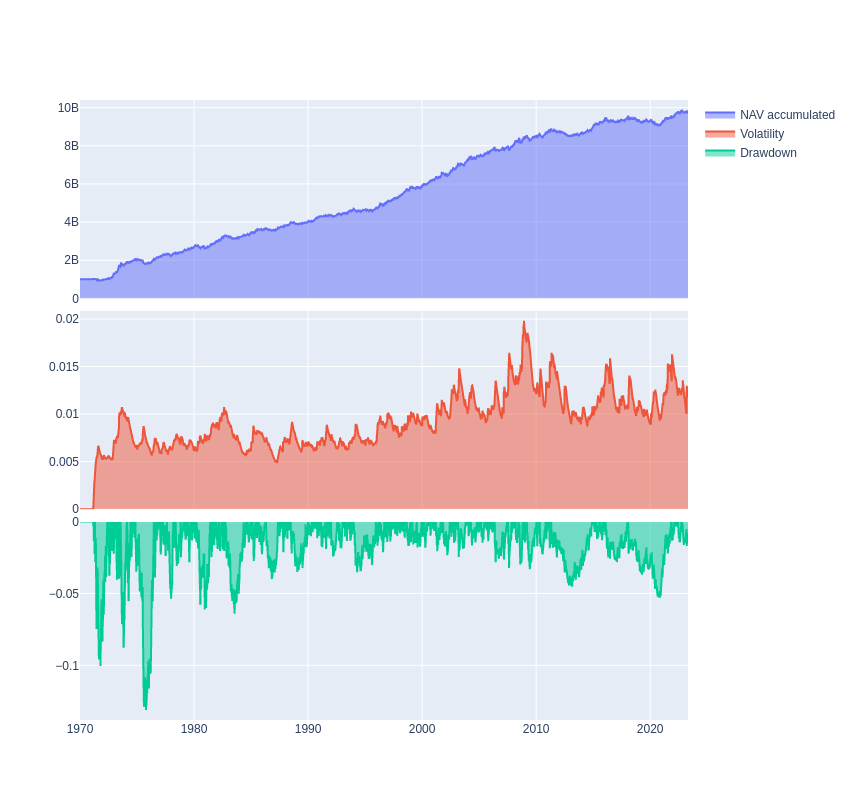

In [5]:
portfolio.plot()

In [6]:
portfolio.metrics()

{'Sharpe': 1.0344117430122477,
 'Kurtosis': 4.046445010191249,
 'Skewness': -0.3836470049849846,
 'Annualized Volatility (%)': 15.414340127194825,
 'Annualized Return (%)': 15.944774438355227}